In [1]:
import sys, os 
sys.path.append('..')
sys.path.append('../../../../utils')
sys.path.append('../../../../third')
import glob
import pandas as pd
import matplotlib.pyplot as plt
import gezi
from gezi import tqdm
from qqbrowser import visualize as vis
import json
from sklearn.metrics.pairwise import cosine_similarity
import sklearn.preprocessing as skp
import numpy as np

2021-10-12 10:07:49.740706: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
labels = pd.read_csv('../input/pairwise/label.csv')
labels['query'] = labels['query'].astype(int)
labels['candidate'] = labels['candidate'].astype(int)
labels['similarity'] = -1.

In [3]:
labels

,Unnamed: 0,id,pid,query,candidate,relevance,similarity,relevance2,ori,hash_group
0,0,0,1274286F9083F3D3,2345203561710400875,5344606281729891758,1.00,-1.0,20,1,1
1,326,1,28C181C52657DBA4,759945328762912122,5560784129870034298,0.85,-1.0,17,1,17
2,327,2,384D8882D3F4373B,2336209090533711226,8010747189096226170,1.00,-1.0,20,1,2
3,328,3,53F9D21849B3DF6C,2588403135132530094,5380633252649788846,0.25,-1.0,5,1,17
4,329,4,457C55F4F165510F,3245934094259209594,120437073895839098,1.00,-1.0,20,1,8
...,...,...,...,...,...,...,...,...,...,...
67894,619022,67894,11C3774065099D6F,3750336164790283694,6578593639340324218,0.50,-1.0,10,1,0
67895,619023,67895,3913763E9186922A,4587992807793958251,3651241564586845614,0.05,-1.0,1,1,17
67896,619024,67896,5C6086FBCA080C11,4939290286258343342,2750529751830584750,0.00,-1.0,0,1,3
67897,619025,67897,1F5C9ED4B97BB99D,7461297012077098362,5939084830845425070,1.00,-1.0,20,1,8


In [4]:
v = 34
model = 'base'
model_dir = f'../working/offline/{v}/{model}/pairwise/0'

In [5]:
label_file = f'{model_dir}/valid.csv'
if os.path.exists(label_file):
  labels = pd.read_csv(label_file)
  labels['pid'] = labels.apply(lambda x: gezi.hash_str(str(x.query) + str(x.candidate)).upper(), axis=1)
  labels = labels[['pid', 'query', 'candidate', 'relevance', 'similarity']]
labels

,pid,query,candidate,relevance,similarity
0,25D8CFFB27BF4464,615827778566262138,3173862170921565614,0.0,0.024694
1,62628FE954B4991B,1984914269213707694,4732118848515319214,0.3,0.505058
2,1416067DABD955E4,3444084474131774894,6776750945445578158,0.4,0.347282
3,B38C46F9138CF4A,3011742186612430254,5830984832962063723,0.2,0.200972
4,23825D9A478CDEE2,4651057014017650042,2615430391561735598,0.0,0.144493
...,...,...,...,...,...
3256,15D23B27CC598E08,2444296012780684718,5849019412963722670,0.0,0.124432
3257,242F32AA414C93CA,3435066045418419630,678879951733634478,0.0,-0.269000
3258,483F3BED3A5B07B4,2327204379947156910,3561180081275956602,0.0,0.107713
3259,75A93900CFD38EC5,2381237909985088875,1570590905031538094,1.0,0.485075


In [6]:
logger = vis.ImageLogger(path=model_dir, load_tags=True)

In [7]:
def display(start, count=10):
  for i in range(start, start + count):
    try:
      # print(i, labels.loc[i, 'pid'], labels.loc[i, 'query'], labels.loc[i, 'candidate'])
      logger.display_pair(labels.loc[i, 'query'], labels.loc[i, 'candidate'], labels.loc[i, 'relevance'], labels.loc[i, 'similarity'])
    except Exception as e:
      pass

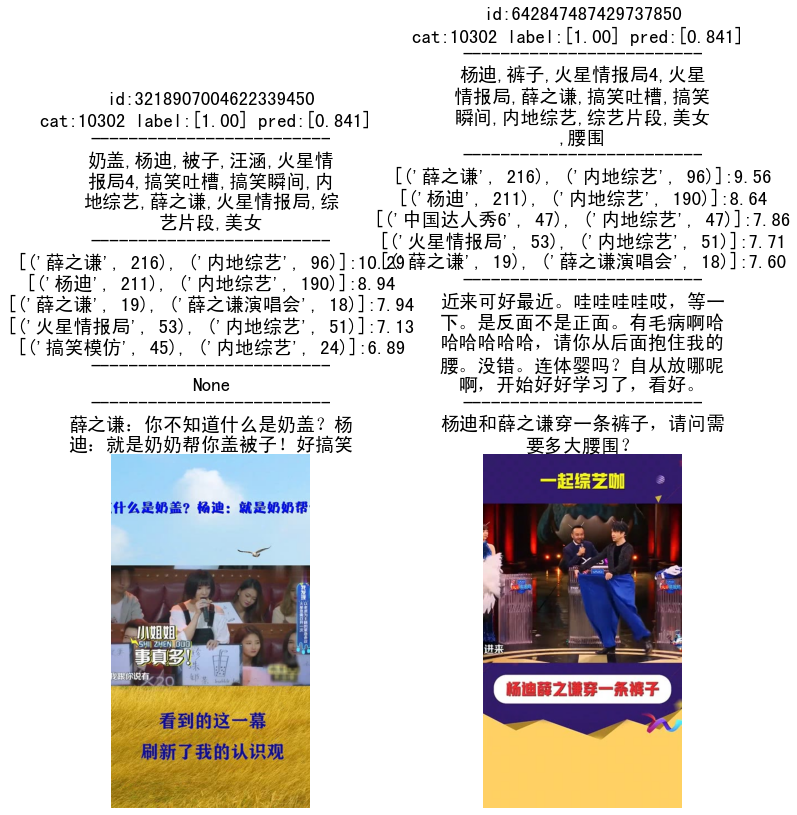

In [8]:
display(2000, 2)

In [9]:
file = f'{model_dir}/valid.json'
with open(file) as f:
  vid_embedding = json.load(f)

In [12]:
keys, l = [], []
for key in tqdm(vid_embedding):
  vid_embedding[key] = list(skp.normalize([np.asarray(vid_embedding[key])])[0])
  l.append(vid_embedding[key])
  keys.append(key)
emb_matrix = np.asarray(l)
keys_dict = dict(zip(keys, range(len(keys))))
embs_sim = np.matmul(emb_matrix, np.transpose(emb_matrix))

  0%|          | 0/5756 [00:00<?, ?it/s]

In [15]:
key = keys[0]
index = keys_dict[key]
index

0

In [18]:
top_sim = np.argsort(-embs_sim[index])[:5]

In [21]:
tail_sim = reversed(np.argsort(-embs_sim[index])[-5:])

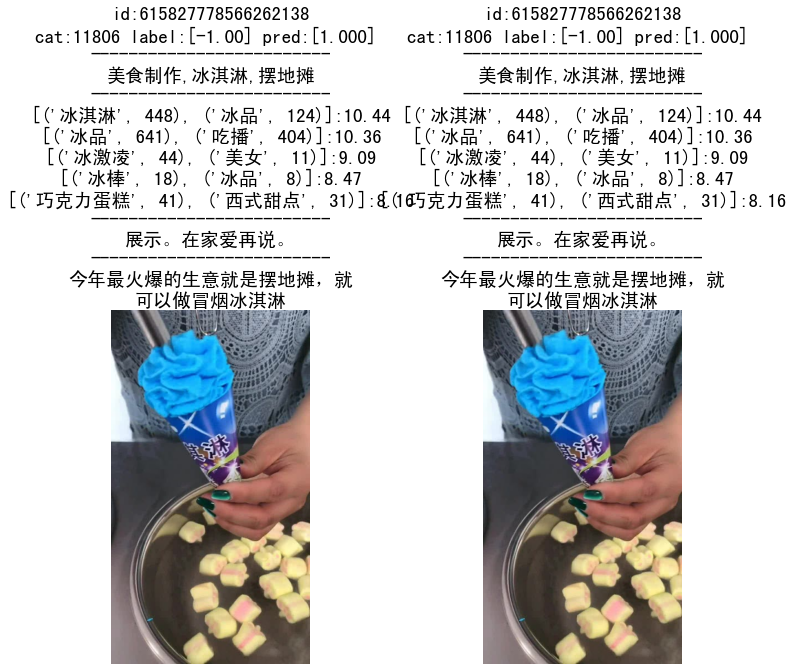

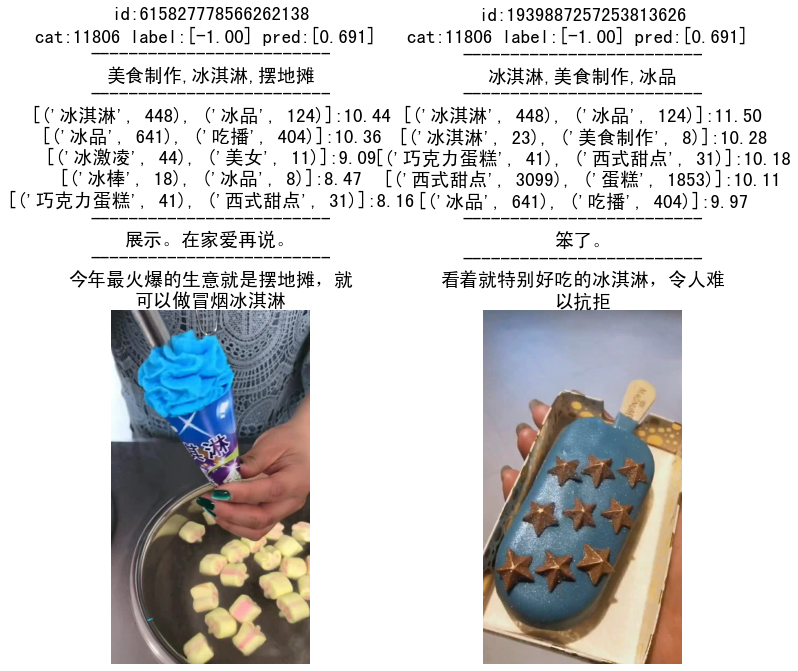

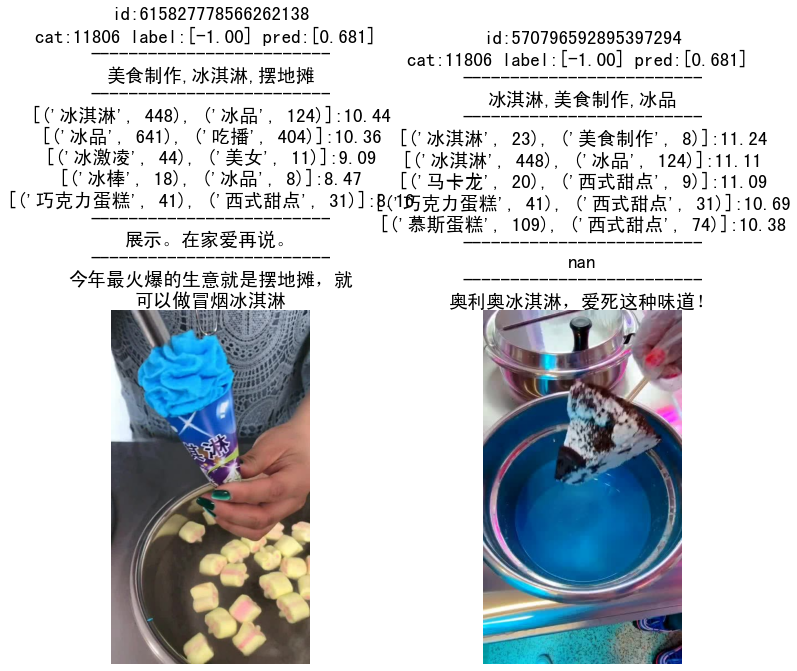

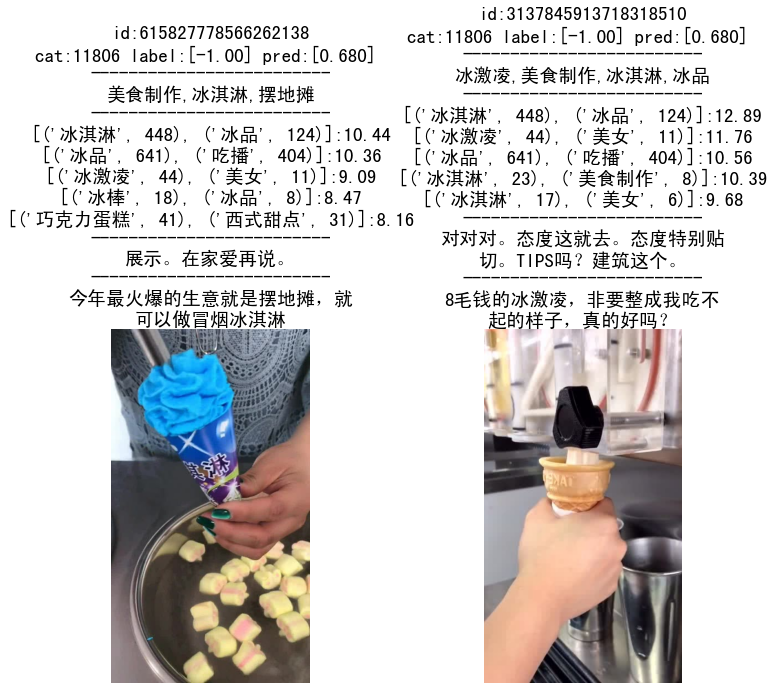

In [24]:
for index_ in top_sim:
  try:
    logger.display_pair(int(keys[index]), int(keys[index_]), -1., embs_sim[index][index_])
  except Exception:
    pass